# Assignment 5 – Machine Learning in R
By Omar 7/24/25 see environment.yml **Description**:  
This notebook explores basic machine learning using [scikit-learn/caret/etc.], including data preparation, model training, and evaluation.

# Load data the easy way

save iris data as csv file

In [35]:
# Load required package
library(caret)

# Step 1: Load the dataset (with headers)
filename <- "iris_data.csv"
dataset <- read.csv(filename, header = TRUE)

# Step 2: Ensure the 'Species' column is a factor
dataset$Species <- as.factor(dataset$Species)

# Step 3: Drop any invalid or unused factor levels
dataset$Species <- droplevels(dataset$Species)

# Step 4: Confirm structure and class levels
print(str(dataset))              # Should show 150 obs. of 5 variables
print(levels(dataset$Species))   # Should return 3 species only

# Step 5: Partition the data (80% for training)
set.seed(123)  # For reproducibility
validation_index <- createDataPartition(dataset$Species, p = 0.80, list = FALSE)

training <- dataset[validation_index, ]
validation <- dataset[-validation_index, ]

# Step 6: Confirm the dataset shapes
cat("Training set size: ", dim(training), "\n")     # Should be 120 x 5
cat("Validation set size: ", dim(validation), "\n") # Should be 30 x 5

# Step 7: Check class distribution
cat("Training class distribution:\n")
print(table(training$Species))

cat("Validation class distribution:\n")
print(table(validation$Species))


ERROR: Error in `$<-.data.frame`(`*tmp*`, Species, value = structure(integer(0), levels = character(0), class = "factor")): replacement has 0 rows, data has 150


In [36]:
rm(list = ls())  # Clear all variables



In [37]:
# Load required package
library(caret)

# Read the CSV file (WITH HEADER)
filename <- "iris_data.csv"
dataset <- read.csv(filename, header = TRUE, stringsAsFactors = TRUE)

# Check the first few rows to confirm structure
head(dataset)


,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [38]:
str(dataset)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


In [40]:
dataset$Species <- droplevels(dataset$species)


In [42]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

# Summarize Dataset

Dimensions of Dataset

In [44]:
# dimensions of dataset
dim(dataset)

[1] 120   6

Types of Attributes

In [62]:
colnames(dataset)


[1] "sepal_length" "sepal_width"  "petal_length" "petal_width"  "species"     
[6] "Species"

In [63]:
dataset$Species <- NULL


Create a Validation Dataset

In [65]:
colnames(dataset)
# Should now output: "sepal_length" "sepal_width" "petal_length" "petal_width" "Species"


[1] "sepal_length" "sepal_width"  "petal_length" "petal_width"  "species"

In [67]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [68]:
# list types for each attribute
sapply(dataset, class)

sepal_length  sepal_width petal_length  petal_width      species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

Peek at the data

In [69]:
# take a peek at the first 5 rows of the data
head(dataset)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa


Levels of the Class

In [85]:
# list the levels for the class
levels(dataset$species)

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

Class Distribution

In [87]:
# summarize the class distribution
percentage <- prop.table(table(dataset$species)) * 100
cbind(freq=table(dataset$species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


Statistical Summary

In [72]:
# summarize attribute distributions
summary(dataset)

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.450   Median :1.400  
 Mean   :5.861   Mean   :3.062   Mean   :3.767   Mean   :1.208  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

# Visualize Dataset

Univariate Plots

In [73]:
str(dataset)


'data.frame':	120 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 5 5.4 4.6 5 4.4 4.8 4.3 ...
 $ sepal_width : num  3.5 3 3.2 3.6 3.9 3.4 3.4 2.9 3.4 3 ...
 $ petal_length: num  1.4 1.4 1.3 1.4 1.7 1.4 1.5 1.4 1.6 1.1 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.2 0.1 ...
 $ species     : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


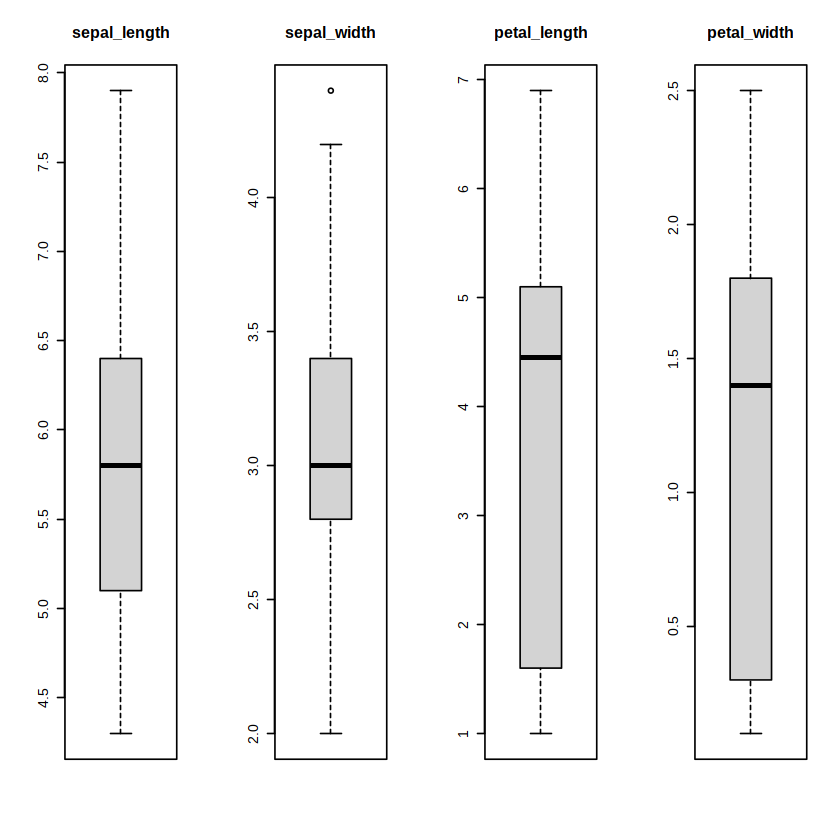

In [74]:
# Split input and output
x <- data.matrix(dataset[, 1:4])  # Ensure numeric
y <- dataset[, 5]

# Boxplots
par(mfrow = c(1, 4))
for(i in 1:4) {
  boxplot(x[, i], main = colnames(x)[i])
}


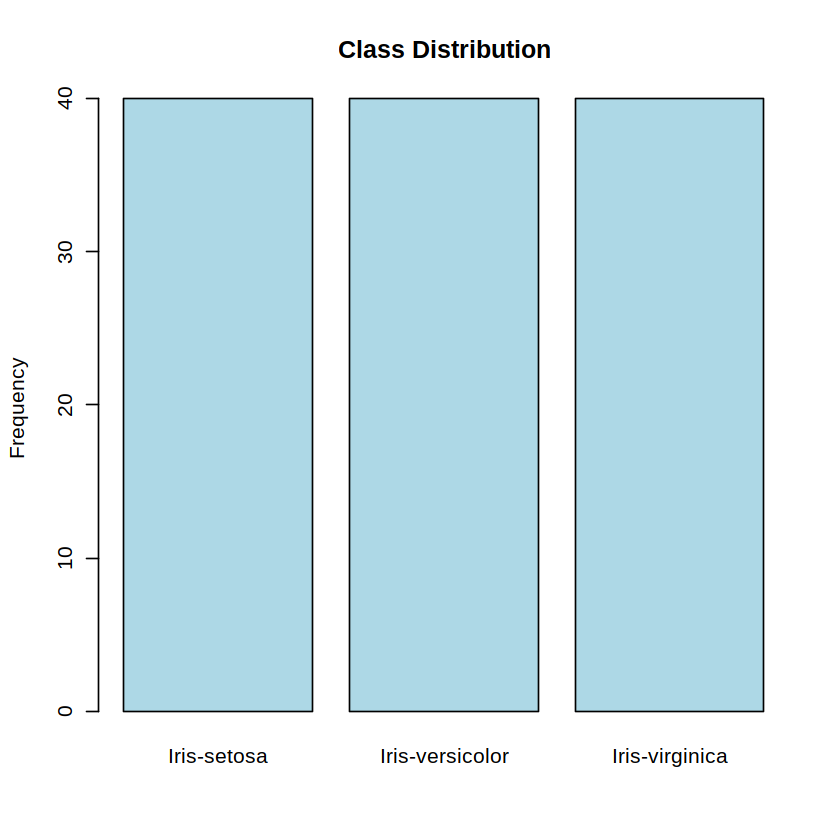

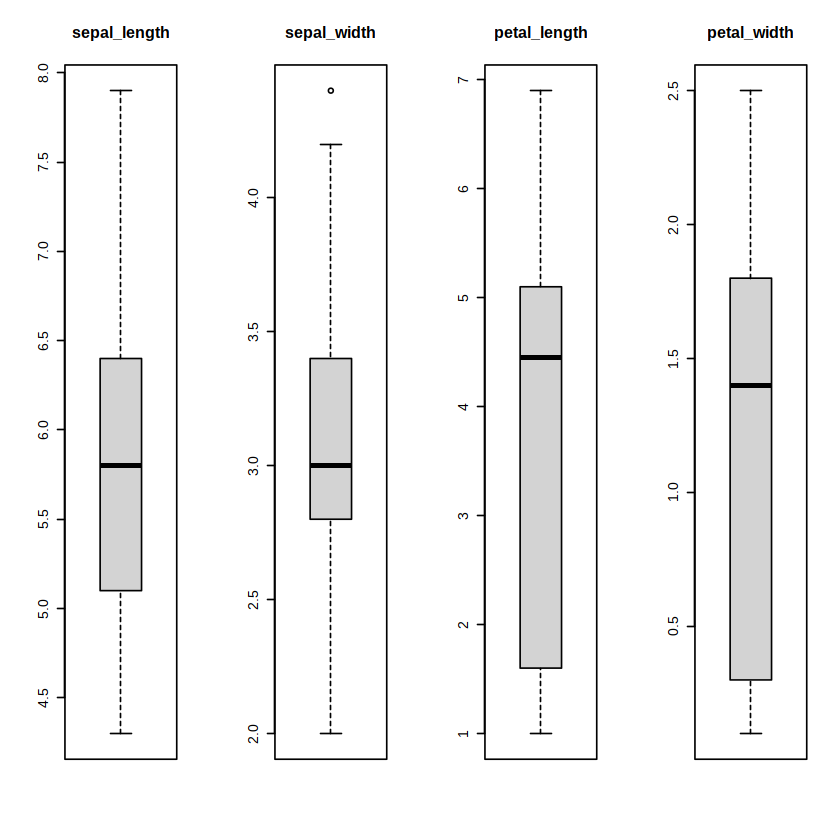

In [88]:
# Barplot of class distribution
plot(dataset$species, main = "Class Distribution", ylab = "Frequency", col = "lightblue")

# Boxplots of numeric features
par(mfrow = c(1, 4))
for (i in 1:4) {
  boxplot(dataset[[i]], main = names(dataset)[i])
}


In [76]:
str(dataset)


'data.frame':	120 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 5 5.4 4.6 5 4.4 4.8 4.3 ...
 $ sepal_width : num  3.5 3 3.2 3.6 3.9 3.4 3.4 2.9 3.4 3 ...
 $ petal_length: num  1.4 1.4 1.3 1.4 1.7 1.4 1.5 1.4 1.6 1.1 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.2 0.1 ...
 $ species     : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


Multivariate Plots

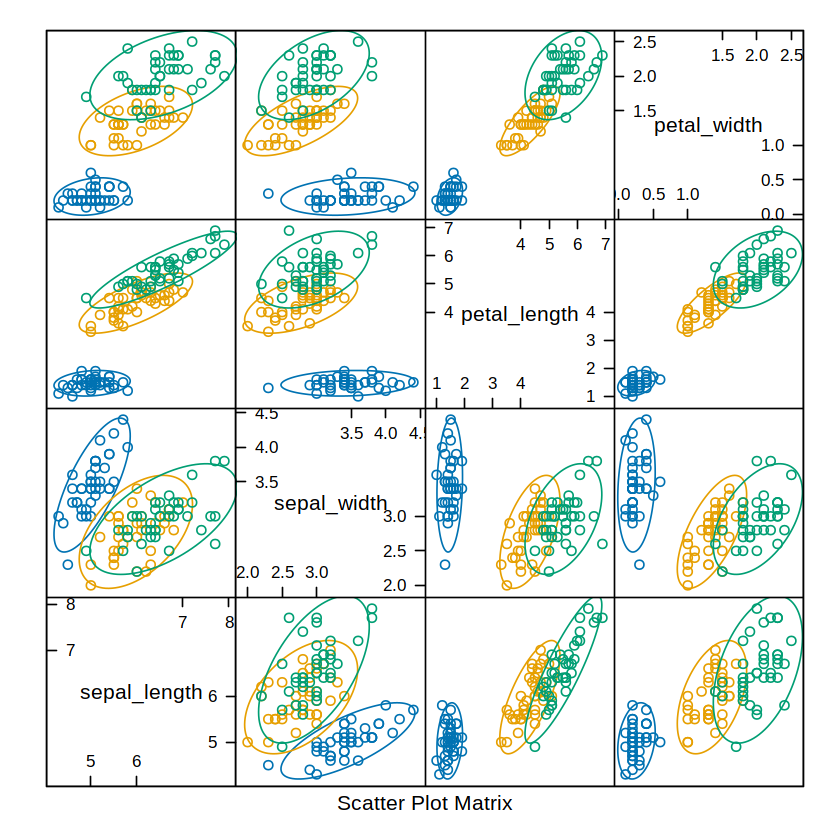

In [89]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

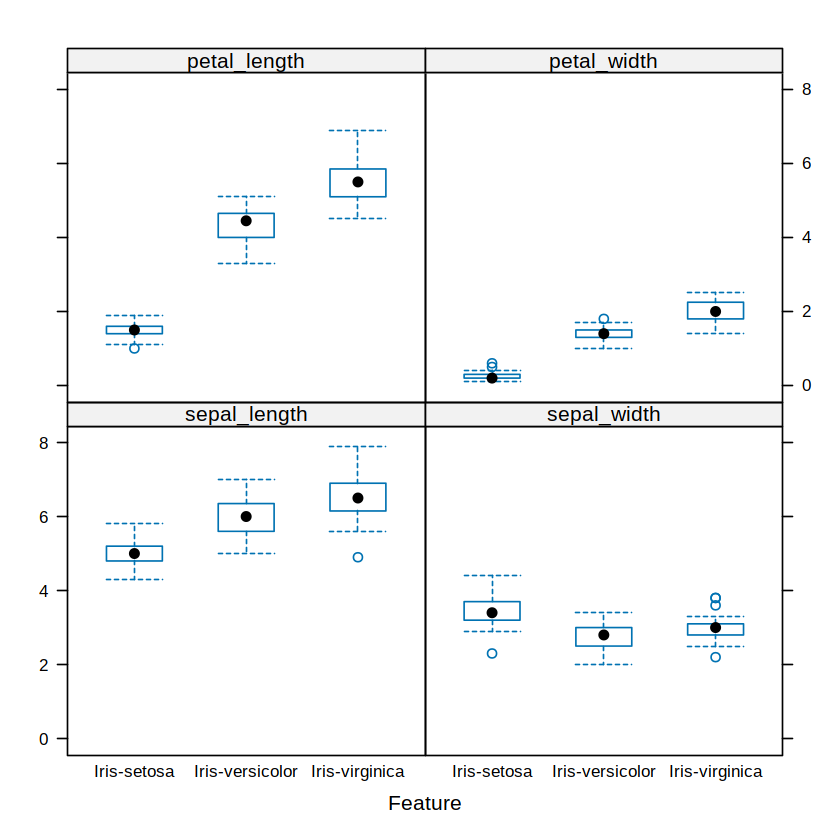

In [90]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

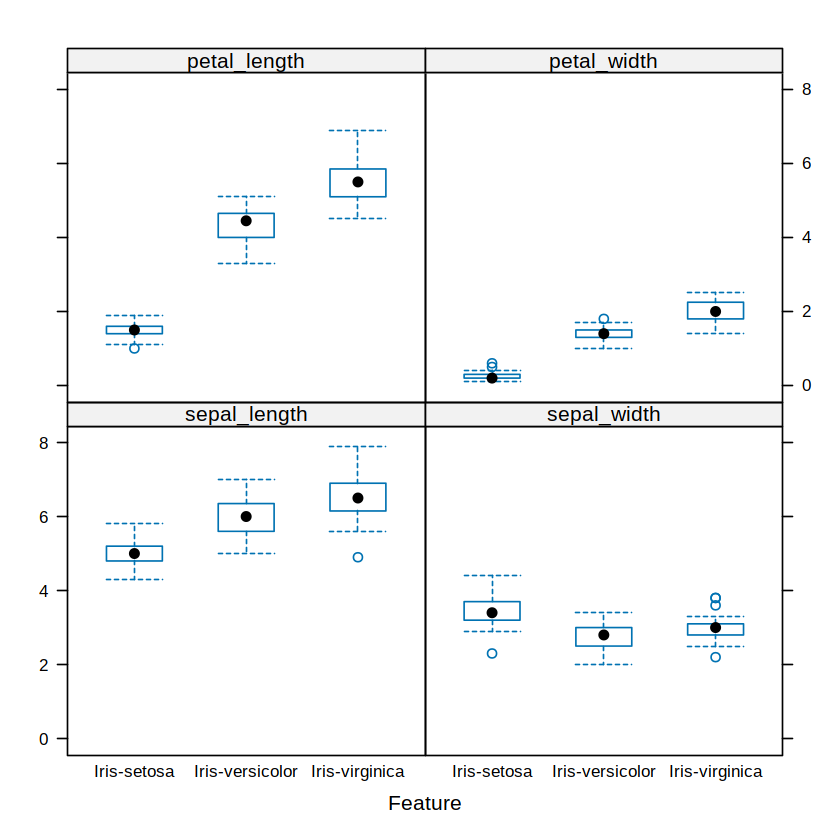

In [79]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

# Evaluate Some Algorithms

Test Harness

In [80]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

Build Models

In [91]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(species~., data=dataset, method="rf", metric=metric, trControl=control)

Select Best Model

In [92]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 1.0000000 1.0000000 0.9750000       1    1    0
cart 0.7500000 0.8541667 0.9583333 0.9250000       1    1    0
knn  0.8333333 0.9375000 1.0000000 0.9666667       1    1    0
svm  0.8333333 0.9166667 0.9583333 0.9500000       1    1    0
rf   0.8333333 0.8541667 1.0000000 0.9416667       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.750 1.00000 1.0000 0.9625       1    1    0
cart 0.625 0.78125 0.9375 0.8875       1    1    0
knn  0.750 0.90625 1.0000 0.9500       1    1    0
svm  0.750 0.87500 0.9375 0.9250       1    1    0
rf   0.750 0.78125 1.0000 0.9125       1    1    0


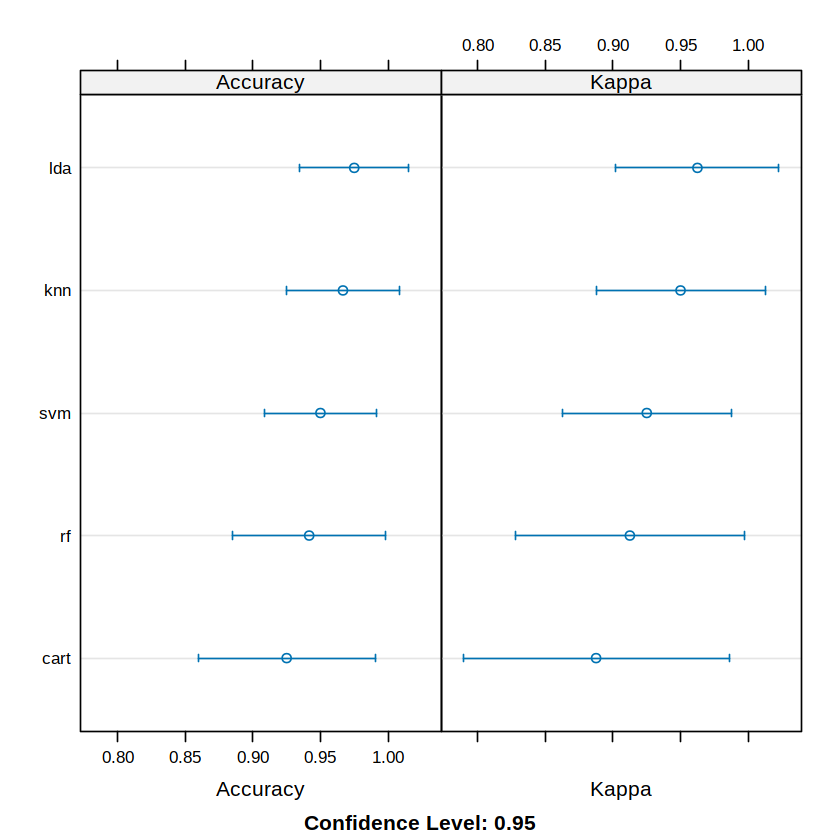

In [93]:
# compare accuracy of models
dotplot(results)

In [94]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



Make Predictions

In [95]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value                   1.0000                 1.0